## Calibration of lab probes, separately ANK1 ANK2 P20

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes have been bent on purpose. ANK probes and P20 were calibrated separately. Only P20 plugged in or ANKs only plugged in.

Probe P20 is used in the profiler.

Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P20

I ran this calibration in situ for ANK1, ANK2 and P20 on the profiler.

In [5]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [14]:
df = pd.read_csv('../calibration_independent_12jul19/calibration.csv',header=2)
print(df)


    percentage  density  temperature  ml of salt sol.  ml fresh
0          100  1.04774       20.020              NaN       NaN
1           90  1.04285       20.016              NaN       NaN
2           80  1.03746       20.020              NaN       NaN
3           70  1.03339       20.008              NaN       NaN
4           60  1.02804       20.005              NaN       NaN
5           50  1.02161       20.027              NaN       NaN
6           40  1.01630       20.007              NaN       NaN
7           30  1.01325       20.025              NaN       NaN
8           20  1.00812       20.040              NaN       NaN
9           10  1.00291       20.012              NaN       NaN
10           0  0.99837       20.032              NaN       NaN


../calibration_independent_12jul19/ANK_100pc.mat
../calibration_independent_12jul19/ANK_090pc.mat
../calibration_independent_12jul19/ANK_080pc.mat
../calibration_independent_12jul19/ANK_070pc.mat
../calibration_independent_12jul19/ANK_060pc.mat
../calibration_independent_12jul19/ANK_050pc.mat
../calibration_independent_12jul19/ANK_040pc.mat
../calibration_independent_12jul19/ANK_030pc.mat
../calibration_independent_12jul19/ANK_020pc.mat
../calibration_independent_12jul19/ANK_010pc.mat
../calibration_independent_12jul19/ANK_000pc.mat


Text(0.5,1,'CH3 - P20 ')

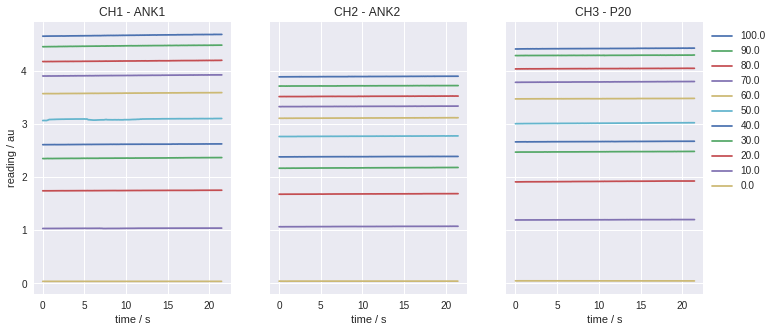

In [15]:
nums = ['100','090','080','070','060','050','040','030','020','010','000']
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_independent_12jul19/ANK_%spc.mat' %num
    filepath2 = '../calibration_independent_12jul19/P20_%spc.mat' %num
    
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    mat2 = sio.loadmat(filepath2, squeeze_me=True)
    
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat2['ch3']
    time = mat['time']
    time2 = mat2['time']
    nsamples = mat['nSamples']
    nsamples2 = mat2['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time2,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')
ax2.set_title('CH3 - P20 ')

ANK1
rho_1 = 0.998103+0.004159r+0.000582r^2+0.000166r^3 

ANK2
rho_2 = 0.998142+0.003846r+0.000306r^2+0.000506r^3 

Probe P
rho_P = 0.998225+0.002238r+0.001219r^2+0.000168r^3


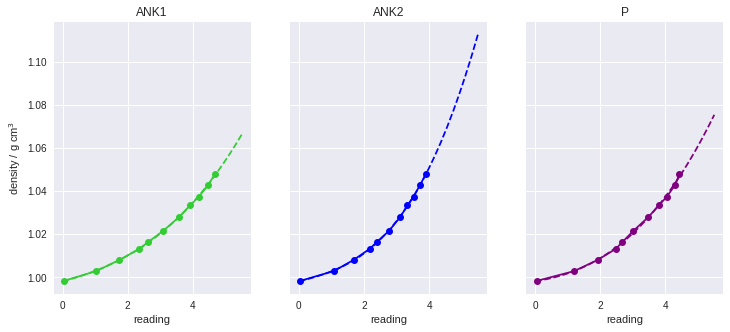

In [16]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density),3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density),3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[:],np.array(df.density),3,full=True)

read_dummy = np.linspace(0,5.5,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax2.set_title('P')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))